#This big data code is about data understanding which will help us know more about the dataset we are working with.

In [ ]:
# check if this instance of the notebook already has files present
# and thus determine which steps required prior to reading in file and handling the data
!ls

sample_data


In [ ]:
# set-up spark (NB if Apache amend versions on download site we will need to amend path in wget command)
## NOTE that this version would make use of Hadoop if installed BUT that HDFS & Hadoop is not installed on our Colab
## (we are only using a single node (probably as a VM) so we will not be able to benefit from parallelism)
!clear
!echo welcome

!rm -f spark-3.4.[01]-bin-hadoop3.tgz*
!rm -rf spark-3.4.[01]-bin-hadoop3

!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget https://downloads.apache.org/spark/spark-3.4.2/spark-3.4.2-bin-hadoop3.tgz
!tar -xf spark-3.4.2-bin-hadoop3.tgz

!ls -alt
print("standalone Spark is now installed")

welcome
--2024-04-15 13:03:57--  https://downloads.apache.org/spark/spark-3.4.2/spark-3.4.2-bin-hadoop3.tgz
Resolving downloads.apache.org (downloads.apache.org)... 88.99.208.237, 135.181.214.104, 2a01:4f9:3a:2c57::2, ...
Connecting to downloads.apache.org (downloads.apache.org)|88.99.208.237|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 388664780 (371M) [application/x-gzip]
Saving to: ‘spark-3.4.2-bin-hadoop3.tgz’

spark-3.4.2-bin-had 100%[===================>] 370.66M  21.4MB/s    in 18s     

2024-04-15 13:04:16 (20.5 MB/s) - ‘spark-3.4.2-bin-hadoop3.tgz’ saved [388664780/388664780]

total 379580
drwxr-xr-x  1 root root      4096 Apr 15 13:04 .
drwxr-xr-x  1 root root      4096 Apr 15 13:02 ..
drwxr-xr-x  1 root root      4096 Apr 11 13:21 sample_data
drwxr-xr-x  4 root root      4096 Apr 11 13:21 .config
-rw-r--r--  1 root root 388664780 Nov 25 07:49 spark-3.4.2-bin-hadoop3.tgz
drwxr-xr-x 13 1000 1000      4096 Nov 25 07:48 spark-3.4.2-bin-hadoop3
standa

In [ ]:
# init spark (ensure SPARK_HOME set to same version as we download earlier)
!pip3 install findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.4.2-bin-hadoop3"
import findspark
findspark.init()
from pyspark import SparkConf, SparkContext
# the next line gives us 'local' mode. try 'local[2]' to use 2 cores or 'master:NNNN' to run on Spark standalone cluster at port NNNN
spark_conf = SparkConf().setMaster('local[2]').setAppName('MyApp')
sc = SparkContext(conf=spark_conf)
# see what we have by examining the Spark User Interface
from pyspark.sql import *
from pyspark.sql.functions import *
SparkSession.builder.getOrCreate()

In [ ]:
# TO DO: init spark (ensure SPARK_HOME set to same version as we download)
import os


# use 'spark' as reference (as per standard approach)
spark = SparkSession.builder.appName("bikes").getOrCreate()

In [ ]:
# get bike hire file for given year from TfL open data
!wget https://cycling.data.tfl.gov.uk/usage-stats/cyclehireusagestats-2014.zip
!unzip cyclehireusagestats-2014.zip

--2024-04-15 13:04:38--  https://cycling.data.tfl.gov.uk/usage-stats/cyclehireusagestats-2014.zip
Resolving cycling.data.tfl.gov.uk (cycling.data.tfl.gov.uk)... 104.16.97.104, 104.16.98.104
Connecting to cycling.data.tfl.gov.uk (cycling.data.tfl.gov.uk)|104.16.97.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 225215129 (215M) [application/zip]
Saving to: ‘cyclehireusagestats-2014.zip’

cyclehireusagestats 100%[===================>] 214.78M   159MB/s    in 1.3s    

2024-04-15 13:04:39 (159 MB/s) - ‘cyclehireusagestats-2014.zip’ saved [225215129/225215129]

Archive:  cyclehireusagestats-2014.zip
  inflating: 1. Journey Data Extract 05Jan14-02Feb14.csv  
  inflating: 10a. Journey Data Extract 14Sep14-27Sep14.csv  
  inflating: 10b. Journey Data Extract 28Sep14-11Oct14.csv  
  inflating: 11a. Journey Data Extract 12Oct14-08Nov14.csv  
  inflating: 11b. Journey Data Extract 12Oct14-08Nov14.csv  
  inflating: 12a. Journey Data Extract 09Nov14-06Dec14.csv  
  i

In [ ]:
A="./1. Journey*csv"
B="./2. Journey*csv"
C="./3. Journey*csv"
D="./4. Journey*csv"
E="./5. Journey*csv"
F="./6. Journey*csv"
J="./7. Journey*csv"
H="./8a Journey*csv"
I="./8b Journey*csv"
L="./9a Journey*csv"
M="./9b Journey*csv"
N="./10a. Journey*csv"
O="./10b. Journey*csv"
P="./11a. Journey*csv"
Q="./11b. Journey*csv"
R="./12a. Journey*csv"
S="./12b. Journey*csv"
T="./13a. Journey*csv"
U="./13b. Journey*csv"
V="./14. Journey*csv"
spark = SparkSession.builder.appName("bikes").getOrCreate()
cycle = (spark.read.format("csv")
         .option("header", "true")
         .option("inferSchema", "true")
         .load([A, B, C, D, E, F, H, I, J, L, M, N, O, P, Q, R, S, T, U, V]))

# show top 10
cycle.show(10)

+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
|Rental Id|Duration|Bike Id|        End Date|EndStation Id|     EndStation Name|      Start Date|StartStation Id|   StartStation Name|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
| 34263367|    1080|   9076|24/06/2014 00:57|          695|Islington Green, ...|24/06/2014 00:39|            311|Foley Street, Fit...|
| 34603487|     660|   6328|03/07/2014 11:51|          695|Islington Green, ...|03/07/2014 11:40|             22|Northington Stree...|
| 34689078|     120|   2006|05/07/2014 15:09|          357|Howland Street, F...|05/07/2014 15:07|            311|Foley Street, Fit...|
| 34724273|    1260|   7904|06/07/2014 16:35|          695|Islington Green, ...|06/07/2014 16:14|            311|Foley Street, Fit...|
| 34956750|    1500|   8251|13/07/2014 00:41|          

In [ ]:
# count the number of rows in the dataframe
num_rows = cycle.count()
print("Number of rows: ", num_rows)

# count the number of columns in the dataframe
num_cols = len(cycle.columns)
print("Number of columns: ", num_cols)

Number of rows:  11481596
Number of columns:  9


In [ ]:
# Print column names
column_names = cycle.columns

print(column_names)

['Rental Id', 'Duration', 'Bike Id', 'End Date', 'EndStation Id', 'EndStation Name', 'Start Date', 'StartStation Id', 'StartStation Name']


In [ ]:
# Show the summary statistics
description = cycle.describe()
description.show()

+-------+--------------------+------------------+------------------+----------------+-----------------+--------------------+----------------+------------------+--------------------+
|summary|           Rental Id|          Duration|           Bike Id|        End Date|    EndStation Id|     EndStation Name|      Start Date|   StartStation Id|   StartStation Name|
+-------+--------------------+------------------+------------------+----------------+-----------------+--------------------+----------------+------------------+--------------------+
|  count|            10242483|          10242483|          10242483|        10242483|         10242351|            10242351|        10242483|          10242483|            10242483|
|   mean|3.4862637579402864E7| 1466.081447242822| 6712.062896858115|            null|320.5373222417392|                null|            null| 321.1881879618448|                null|
| stddev|  3169119.8833308937|12946.838147599005|3719.8446340975797|            null|210.2

In [ ]:
#check for null values
cycle.select([count(when(col(c).isNull(), c)).alias(c) for c in cycle.columns]).show()

+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+
|Rental Id|Duration|Bike Id|End Date|EndStation Id|EndStation Name|Start Date|StartStation Id|StartStation Name|
+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+
|  1239113| 1239113|1239113| 1239113|      1239245|        1239245|   1239113|        1239113|          1239113|
+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+



In [ ]:
#drop the null values
cycle = cycle.drop(*[c for c in cycle.columns if cycle.select(c).na.drop().count() == 0])
cycle = cycle.dropna()

cycle.select([count(when(col(c).isNull(), c)).alias(c) for c in cycle.columns]).show()
cycle.show()

+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+
|Rental Id|Duration|Bike Id|End Date|EndStation Id|EndStation Name|Start Date|StartStation Id|StartStation Name|
+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+
|        0|       0|      0|       0|            0|              0|         0|              0|                0|
+---------+--------+-------+--------+-------------+---------------+----------+---------------+-----------------+

+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
|Rental Id|Duration|Bike Id|        End Date|EndStation Id|     EndStation Name|      Start Date|StartStation Id|   StartStation Name|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
| 34263367|    1080|   9076|2

In [ ]:
from pyspark.sql.functions import col

# filter for negative duration
negative_cycle = cycle.filter(col("Duration") < 0)

# Count the number of rows with negative durations
num_negative_durations = negative_cycle.count()
print(f"Number of rows with negative durations: {num_negative_durations}")

# show a few of these rows to examine their content
if num_negative_durations > 0:
    print("Sample rows with negative durations:")
    negative_cycle.show(n=5)  # Show first 5 entries

Number of rows with negative durations: 149
Sample rows with negative durations:
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
|Rental Id|Duration|Bike Id|        End Date|EndStation Id|     EndStation Name|      Start Date|StartStation Id|   StartStation Name|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+
| 38748858|   -2340|  11733|26/10/2014 01:01|          489|Christian Street,...|26/10/2014 01:40|             64|William IV Street...|
| 38748947|   -2820|  10942|26/10/2014 01:05|          291|Claverton Street,...|26/10/2014 01:52|            755|   The Vale, Chelsea|
| 38748893|   -2160|   9949|26/10/2014 01:08|          470|   Mostyn Grove, Bow|26/10/2014 01:44|             17|Hatton Wall, Holborn|
| 38748965|   -3360|   7268|26/10/2014 01:00|          540|Albany Street, Re...|26/10/2014 01:56|            

In [ ]:
# DataFrame with the filtered result where all durations are non-negative
cycle = cycle.filter(col("Duration") > 0)

In [ ]:
# Group by 'Rental Id', count occurrences, and filter duplicates
duplicates = cycle.groupBy('Rental Id') \
    .count() \
    .filter(col('count') > 1)

# Show the duplicate values
duplicates.show()


+---------+-----+
|Rental Id|count|
+---------+-----+
+---------+-----+



In [ ]:
from pyspark.sql.functions import to_timestamp
#Convert the date and time columns to timestamp format and calculate the duration of each ride.


cycle = cycle.withColumn('Start Date', to_timestamp('Start Date', 'dd/MM/yyyy HH:mm'))
cycle = cycle.withColumn('End Date', to_timestamp('End Date', 'dd/MM/yyyy HH:mm'))

In [ ]:
cycle = cycle.withColumn('Duration', (cycle['End Date'].cast('long') - cycle['Start Date'].cast('long')))

In [ ]:
from pyspark.sql.functions import month
# removing year 2013 as the data we are working with starts from 2014
cycle = cycle.filter(year("Start Date") >= 2014)

In [ ]:
from pyspark.sql.functions import col

# Assuming 'journey' is the original DataFrame.
# Ensure 'Duration' column exists and the DataFrame is not empty
if cycle.head(1):
    try:
        # Calculate quantiles and bounds for outlier detection
        quantiles = cycle.approxQuantile("Duration", [0.25, 0.75], 0.05)
        q1 = quantiles[0]
        q3 = quantiles[1]
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Filter out the outliers and update the DataFrame
        cycle = cycle.filter((col("Duration") >= lower_bound) & (col("Duration") <= upper_bound))

        # If you want to keep a separate DataFrame without outliers, you can do:
        # cleaned_journey = journey.filter((col("Duration") >= lower_bound) & (col("Duration") <= upper_bound))

        # Count after removal
        count_after_removal = cycle.count()

        # Print the updated number of rows
        print(f"Number of rows after outlier removal: {count_after_removal}")
    except IndexError as e:
        print("An error occurred with quantile calculation:", e)
else:
    print("The DataFrame is empty or the 'Duration' column does not exist.")


Number of rows after outlier removal: 9191111


In [ ]:
# Now you can count the entries in the DataFrame
j_count = cycle.count()

# Print the count
print(f"Total number of rows in the DataFrame: {j_count}")

Total number of rows in the DataFrame: 9191111


In [ ]:
#calculating and displaying the count of bike ride for each start month

# Extract the month from the 'Start Date' and create a new column for it
cycle = cycle.withColumn("Month", month("Start Date"))

# Example 1: Aggregate data by month (e.g., count rides per month)
monthly_aggregate = cycle.groupBy("Month").count().orderBy("Month")



# Show the results
monthly_aggregate.show()  # This will show the count of rides for each month

+-----+-------+
|Month|  count|
+-----+-------+
|    1| 495855|
|    2| 489666|
|    3| 688650|
|    4| 730215|
|    5| 806360|
|    6| 951963|
|    7|1065475|
|    8| 933804|
|    9| 973603|
|   10| 842363|
|   11| 673467|
|   12| 539690|
+-----+-------+



In [ ]:
from pyspark.sql.functions import desc

top20_df = cycle.orderBy(desc('Duration')).limit(100)
cycle.show()

+---------+--------+-------+-------------------+-------------+--------------------+-------------------+---------------+--------------------+-----+
|Rental Id|Duration|Bike Id|           End Date|EndStation Id|     EndStation Name|         Start Date|StartStation Id|   StartStation Name|Month|
+---------+--------+-------+-------------------+-------------+--------------------+-------------------+---------------+--------------------+-----+
| 34263367|    1080|   9076|2014-06-24 00:57:00|          695|Islington Green, ...|2014-06-24 00:39:00|            311|Foley Street, Fit...|    6|
| 34603487|     660|   6328|2014-07-03 11:51:00|          695|Islington Green, ...|2014-07-03 11:40:00|             22|Northington Stree...|    7|
| 34689078|     120|   2006|2014-07-05 15:09:00|          357|Howland Street, F...|2014-07-05 15:07:00|            311|Foley Street, Fit...|    7|
| 34724273|    1260|   7904|2014-07-06 16:35:00|          695|Islington Green, ...|2014-07-06 16:14:00|            311

In [ ]:
distinct_count = cycle.select('Duration').distinct().count()
print(f"Number of distinct durations: {distinct_count}")


Number of distinct durations: 41


In [ ]:
from pyspark.sql.functions import date_format
#adding a column "day" representing the day of the week that corresponds to the start date
cycle = cycle.withColumn('Day', date_format('Start Date', 'EEEE'))
cycle.show()

+---------+--------+-------+-------------------+-------------+--------------------+-------------------+---------------+--------------------+-----+---------+
|Rental Id|Duration|Bike Id|           End Date|EndStation Id|     EndStation Name|         Start Date|StartStation Id|   StartStation Name|Month|      Day|
+---------+--------+-------+-------------------+-------------+--------------------+-------------------+---------------+--------------------+-----+---------+
| 34263367|    1080|   9076|2014-06-24 00:57:00|          695|Islington Green, ...|2014-06-24 00:39:00|            311|Foley Street, Fit...|    6|  Tuesday|
| 34603487|     660|   6328|2014-07-03 11:51:00|          695|Islington Green, ...|2014-07-03 11:40:00|             22|Northington Stree...|    7| Thursday|
| 34689078|     120|   2006|2014-07-05 15:09:00|          357|Howland Street, F...|2014-07-05 15:07:00|            311|Foley Street, Fit...|    7| Saturday|
| 34724273|    1260|   7904|2014-07-06 16:35:00|          

In [ ]:
from pyspark.sql.functions import sum

from pyspark.sql.functions import col

In [ ]:
# group by "StartStation Id" and sum their "Duration (min)", sort in descending order
strt_df = (cycle
               .select("StartStation Id", "StartStation Name", "EndStation Id", "EndStation Name", "Duration")
               .groupBy("StartStation Id", "StartStation Name")
               .agg(sum("Duration").alias("Total Duration"))
               .orderBy("Total Duration", ascending=False))

# show top 10
strt_df.show(10)
# group "StartStation Id" and sum their "Duration" (seconds), sort in descending order


+---------------+--------------------+--------------+
|StartStation Id|   StartStation Name|Total Duration|
+---------------+--------------------+--------------+
|            191|Hyde Park Corner,...|      87027420|
|             14|Belgrove Street ,...|      69367620|
|            303|Albert Gate, Hyde...|      65005680|
|            307|Black Lion Gate, ...|      60929700|
|            154|Waterloo Station ...|      60871920|
|            213|Wellington Arch, ...|      46118940|
|            248|Triangle Car Park...|      44029200|
|            406|Speakers' Corner ...|      42773820|
|            374|Waterloo Station ...|      40416720|
|            217|Wormwood Street, ...|      40313760|
+---------------+--------------------+--------------+
only showing top 10 rows



In [ ]:
#group by "EndStation Id" and sum their "Duration", sort in descending order
end_df = (cycle
               .select("StartStation Id", "StartStation Name", "EndStation Id", "EndStation Name", "Duration")
               .groupBy("EndStation Id", "EndStation Name")
               .agg(sum("Duration").alias("Total Duration"))
               .orderBy("Total Duration", ascending=False))
end_df.show()



+-------------+--------------------+--------------+
|EndStation Id|     EndStation Name|Total Duration|
+-------------+--------------------+--------------+
|          191|Hyde Park Corner,...|      87842400|
|          303|Albert Gate, Hyde...|      65398740|
|           14|Belgrove Street ,...|      65112060|
|          307|Black Lion Gate, ...|      62571360|
|          374|Waterloo Station ...|      60087120|
|          194|Hop Exchange, The...|      50867940|
|          248|Triangle Car Park...|      46415880|
|          213|Wellington Arch, ...|      44990460|
|          406|Speakers' Corner ...|      42878100|
|          217|Wormwood Street, ...|      42708600|
|          341|Craven Street, St...|      40585080|
|          404|Palace Gate, Kens...|      39594300|
|          112|Stonecutter Stree...|      35870880|
|          407|Speakers' Corner ...|      35841600|
|          541|Green Park Statio...|      35512920|
|          553|Regent's Row , Ha...|      35221620|
|          2

In [ ]:
from pyspark.sql.functions import sum

# lowest is your DataFrame
lowest_duration_station = (cycle
                           .select("StartStation Id", "StartStation Name", "EndStation Id", "EndStation Name", "Duration")
                           .groupBy("StartStation Id", "StartStation Name")
                           .agg(sum("Duration").alias("Total Duration"))
                           .orderBy("Total Duration", ascending=True))

print("Station with the lowest total duration:")

lowest_duration_station.show(10)

Station with the lowest total duration:
+---------------+--------------------+--------------+
|StartStation Id|   StartStation Name|Total Duration|
+---------------+--------------------+--------------+
|            241|Contact Centre, S...|           420|
|            198|           tabletop1|          1500|
|            555|Westfield Eastern...|        521640|
|            778|       Pop Up Dock 1|        567780|
|            672|Grant Road Centra...|        631800|
|            767|Santos Road, Wand...|        634380|
|            777|Limburg Road, Cla...|        730560|
|            767|Wandsworth Museum...|        760560|
|            494|South Quay East, ...|        915900|
|            752|Manfred Road, Eas...|       1070580|
+---------------+--------------------+--------------+
only showing top 10 rows



In [ ]:
# highest duration in your DataFrame
highest_duration_station = (cycle
                            .select("StartStation Id", "StartStation Name", "EndStation Id", "EndStation Name", "Duration")
                            .groupBy("StartStation Id", "StartStation Name")
                            .agg(sum("Duration").alias("Total Duration"))
                            .orderBy("Total Duration", ascending=False))

print("Station with the highest total duration:")
# Show only the first ten row, which will have the highest total duration
highest_duration_station.show(10)

Station with the highest total duration:
+---------------+--------------------+--------------+
|StartStation Id|   StartStation Name|Total Duration|
+---------------+--------------------+--------------+
|            191|Hyde Park Corner,...|      87027420|
|             14|Belgrove Street ,...|      69367620|
|            303|Albert Gate, Hyde...|      65005680|
|            307|Black Lion Gate, ...|      60929700|
|            154|Waterloo Station ...|      60871920|
|            213|Wellington Arch, ...|      46118940|
|            248|Triangle Car Park...|      44029200|
|            406|Speakers' Corner ...|      42773820|
|            374|Waterloo Station ...|      40416720|
|            217|Wormwood Street, ...|      40313760|
+---------------+--------------------+--------------+
only showing top 10 rows



In [ ]:
from pyspark.sql.functions import date_format
#adding a column "day" representing the day of the week that corresponds to the start date
cycle = cycle.withColumn('Day', date_format('Start Date', 'EEEE'))
cycle.show()

+---------+--------+-------+-------------------+-------------+--------------------+-------------------+---------------+--------------------+-----+---------+
|Rental Id|Duration|Bike Id|           End Date|EndStation Id|     EndStation Name|         Start Date|StartStation Id|   StartStation Name|Month|      Day|
+---------+--------+-------+-------------------+-------------+--------------------+-------------------+---------------+--------------------+-----+---------+
| 34263367|    1080|   9076|2014-06-24 00:57:00|          695|Islington Green, ...|2014-06-24 00:39:00|            311|Foley Street, Fit...|    6|  Tuesday|
| 34603487|     660|   6328|2014-07-03 11:51:00|          695|Islington Green, ...|2014-07-03 11:40:00|             22|Northington Stree...|    7| Thursday|
| 34689078|     120|   2006|2014-07-05 15:09:00|          357|Howland Street, F...|2014-07-05 15:07:00|            311|Foley Street, Fit...|    7| Saturday|
| 34724273|    1260|   7904|2014-07-06 16:35:00|          

In [ ]:
from pyspark.sql.functions import min, max

# Calculate the maximum duration for each start station in the  DataFrame
max_dur = cycle.groupBy("StartStation Name").agg(max("Duration").alias("max_duration"))

# Calculate the minimum duration for each start station in the  DataFrame
min_dur = cycle.groupBy("StartStation Name").agg(min("Duration").alias("min_duration"))

In [ ]:
max_dur.show()

+--------------------+------------+
|   StartStation Name|max_duration|
+--------------------+------------+
|Dunston Road , Ha...|        2460|
|George Place Mews...|        2460|
|Panton Street, We...|        2460|
|  Park Lane, Mayfair|        2460|
|Portland Place, M...|        2460|
|Russell Gardens, ...|        2460|
|Montgomery Square...|        2460|
|Kingsway Southbou...|        2460|
|Appold Street, Li...|        2460|
|Gloucester Street...|        2460|
|Cadogan Close, Vi...|        2460|
|Charlotte Street,...|        2460|
|Lambeth Road, Vau...|        2460|
|London Zoo, Regen...|        2460|
|Embankment (Horse...|        2460|
|Falcon Road, Clap...|        2460|
|Christopher Stree...|        2460|
|Queen Marys, Mile...|        2460|
|Imperial Road, Sa...|        2460|
|Finlay Street, Fu...|        2460|
+--------------------+------------+
only showing top 20 rows



In [ ]:
min_dur.show()

+--------------------+------------+
|   StartStation Name|min_duration|
+--------------------+------------+
|Dunston Road , Ha...|          60|
|George Place Mews...|          60|
|Panton Street, We...|          60|
|  Park Lane, Mayfair|          60|
|Portland Place, M...|          60|
|Russell Gardens, ...|          60|
|Montgomery Square...|          60|
|Kingsway Southbou...|          60|
|Appold Street, Li...|          60|
|Gloucester Street...|          60|
|Cadogan Close, Vi...|         180|
|Charlotte Street,...|          60|
|Lambeth Road, Vau...|          60|
|London Zoo, Regen...|         120|
|Embankment (Horse...|          60|
|Falcon Road, Clap...|          60|
|Christopher Stree...|          60|
|Queen Marys, Mile...|          60|
|Imperial Road, Sa...|          60|
|Finlay Street, Fu...|         120|
+--------------------+------------+
only showing top 20 rows



In [ ]:
#perform inner-join based on start station name
agg_df= max_dur.join(min_dur, ['StartStation Name'], 'inner')
agg_df.show()

+--------------------+------------+------------+
|   StartStation Name|max_duration|min_duration|
+--------------------+------------+------------+
|Dunston Road , Ha...|        2460|          60|
|George Place Mews...|        2460|          60|
|Panton Street, We...|        2460|          60|
|  Park Lane, Mayfair|        2460|          60|
|Portland Place, M...|        2460|          60|
|Russell Gardens, ...|        2460|          60|
|Montgomery Square...|        2460|          60|
|Kingsway Southbou...|        2460|          60|
|Appold Street, Li...|        2460|          60|
|Gloucester Street...|        2460|          60|
|Cadogan Close, Vi...|        2460|         180|
|Charlotte Street,...|        2460|          60|
|Lambeth Road, Vau...|        2460|          60|
|London Zoo, Regen...|        2460|         120|
|Embankment (Horse...|        2460|          60|
|Falcon Road, Clap...|        2460|          60|
|Christopher Stree...|        2460|          60|
|Queen Marys, Mile..

In [ ]:
cycle.show()

+---------+--------+-------+-------------------+-------------+--------------------+-------------------+---------------+--------------------+-----+---------+
|Rental Id|Duration|Bike Id|           End Date|EndStation Id|     EndStation Name|         Start Date|StartStation Id|   StartStation Name|Month|      Day|
+---------+--------+-------+-------------------+-------------+--------------------+-------------------+---------------+--------------------+-----+---------+
| 34263367|    1080|   9076|2014-06-24 00:57:00|          695|Islington Green, ...|2014-06-24 00:39:00|            311|Foley Street, Fit...|    6|  Tuesday|
| 34603487|     660|   6328|2014-07-03 11:51:00|          695|Islington Green, ...|2014-07-03 11:40:00|             22|Northington Stree...|    7| Thursday|
| 34689078|     120|   2006|2014-07-05 15:09:00|          357|Howland Street, F...|2014-07-05 15:07:00|            311|Foley Street, Fit...|    7| Saturday|
| 34724273|    1260|   7904|2014-07-06 16:35:00|          

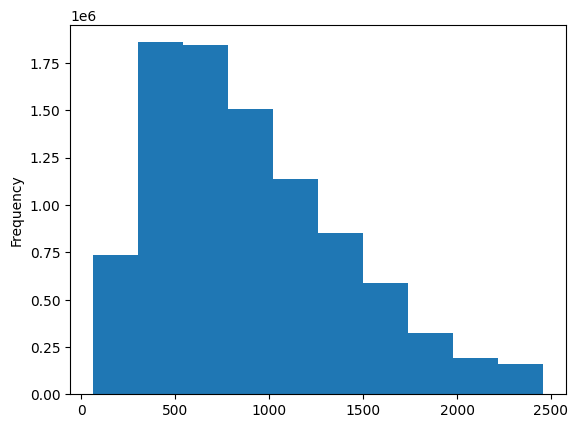

In [ ]:
import matplotlib.pyplot as plt



# e.g. remove rides with Duration of 0 seconds or over 3600
rides_df = cycle.filter("Duration > 0").filter("Duration <= 3600")[["Duration"]]
# now convert to Pandas df and plot
rides_df.toPandas()['Duration'].plot(kind='hist')
plt.show()

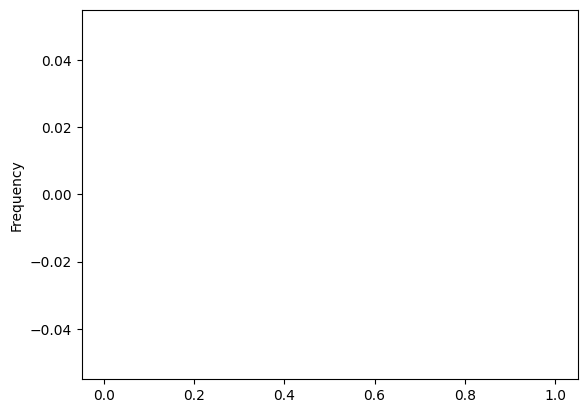

In [ ]:
import matplotlib.pyplot as plt



# e.g. remove rides with Duration of 0 seconds or over 3600
rides_d = cycle.filter("Duration > 3600").filter("Duration <= 8000")[["Duration"]]
# now convert to Pandas df and plot
rides_d.toPandas()['Duration'].plot(kind='hist')
plt.show()

In [ ]:
filtered_j_df = cycle.filter(cycle.Duration >= 7200).select('Duration')
print((filtered_j_df.count(), len(filtered_j_df.columns)))

(0, 1)


In [ ]:
# so vast majority of rides in this month have "Duration" under 2 hours
total = cycle.count()
numExceed = cycle.filter("Duration > 7200").count()
print("Of all rides, percentage over 2 hours:", (numExceed*100)/total)

Of all rides, percentage over 2 hours: 0.0


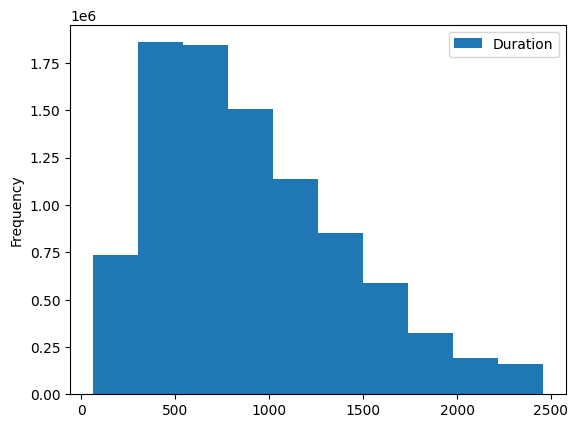

In [ ]:
# e.g. remove rides with Duration of 0 seconds or over 3600
rides_df = cycle.filter("Duration > 0").filter("Duration <= 3600")[["Duration"]]
# now convert to Pandas df and plot
rides_df.toPandas().plot(kind="hist")
plt.show()

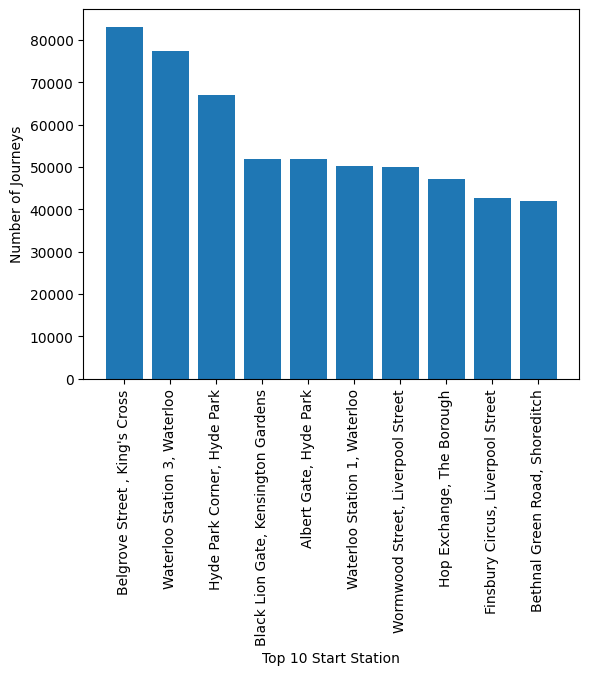

In [ ]:
from pyspark.sql.functions import desc

# Count the number of times each start station appears
start_station_counts = cycle.groupBy("StartStation Name").count()

# Sort the stations by count in descending order
sorted_stations = start_station_counts.orderBy(desc("count"))

# Take the top 10 stations with the most counts
top_stations = sorted_stations.limit(10)

# Convert the top 10 stations to a Pandas dataframe for plotting
pandas_df = top_stations.toPandas()

# Plot a bar chart of the top 10 stations
import matplotlib.pyplot as plt

plt.bar(pandas_df["StartStation Name"], pandas_df["count"])
plt.xticks(rotation=90)
plt.xlabel("Top 10 Start Station")
plt.ylabel("Number of Journeys")
plt.show()

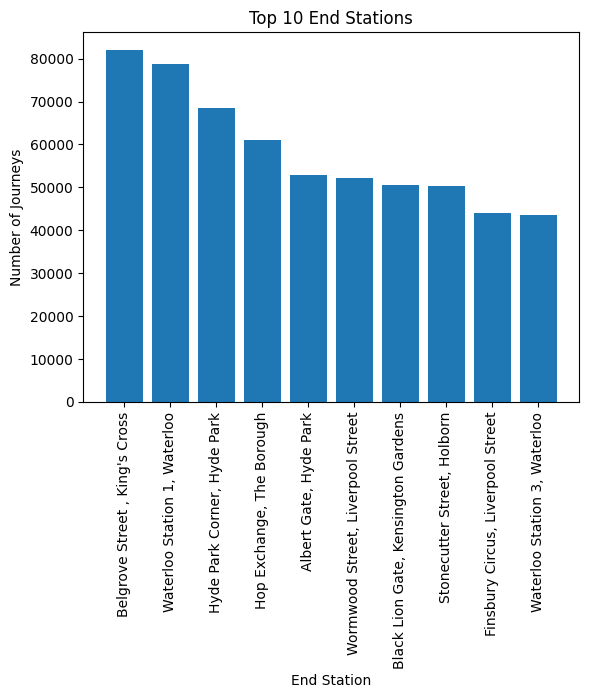

In [ ]:
import matplotlib.pyplot as plt

# Group by End Station and count occurrences
end_station_counts = cycle.groupBy('EndStation Name').count()
sorted_end =end_station_counts.orderBy(desc("count"))


# Get the top 10 stations with the highest counts
top_end_stations = sorted_end.limit(10)

# Extract station names and counts
pandend_df=top_end_stations.toPandas()

# Plot bar chart
plt.bar(pandend_df["EndStation Name"], pandend_df["count"])
plt.xticks(rotation=90)
plt.title('Top 10 End Stations')
plt.xlabel('End Station')
plt.ylabel('Number of Journeys')
plt.show()

In [ ]:
from pyspark.sql.functions import avg, stddev

# Assuming 'Month' is a column in 'df' that represents the month number (1-12)

# Group the data by month and calculate mean and standard deviation for each month
monthly_stats = cycle.groupBy("Month").agg(
    avg(col("Duration")).alias("mean_duration"),
    stddev(col("Duration")).alias("stddev_duration")
).orderBy("Month")  # Order by month for easier readability

# Collect the statistics for all months
monthly_stats_list = monthly_stats.collect()

# Print the results
for month_stat in monthly_stats_list:
    print(f"Month: {month_stat['Month']}, Mean duration: {month_stat['mean_duration']}, Standard deviation: {month_stat['stddev_duration']}")

Month: 1, Mean duration: 784.3356626433131, Standard deviation: 465.6238880711159
Month: 2, Mean duration: 817.7031282547696, Standard deviation: 485.35735803552984
Month: 3, Mean duration: 859.3939446743628, Standard deviation: 506.13094419629545
Month: 4, Mean duration: 887.8128222509808, Standard deviation: 516.3924243863681
Month: 5, Mean duration: 886.62143459497, Standard deviation: 514.4079285532812
Month: 6, Mean duration: 903.0844476098335, Standard deviation: 515.349483515057
Month: 7, Mean duration: 919.7380698749384, Standard deviation: 520.2337896491015
Month: 8, Mean duration: 928.6506804425768, Standard deviation: 522.4337652085923
Month: 9, Mean duration: 884.4378252737512, Standard deviation: 505.8913699492572
Month: 10, Mean duration: 846.094854593566, Standard deviation: 493.5855277923943
Month: 11, Mean duration: 816.135311752469, Standard deviation: 480.72720800444927
Month: 12, Mean duration: 818.9701495302859, Standard deviation: 488.966736964632


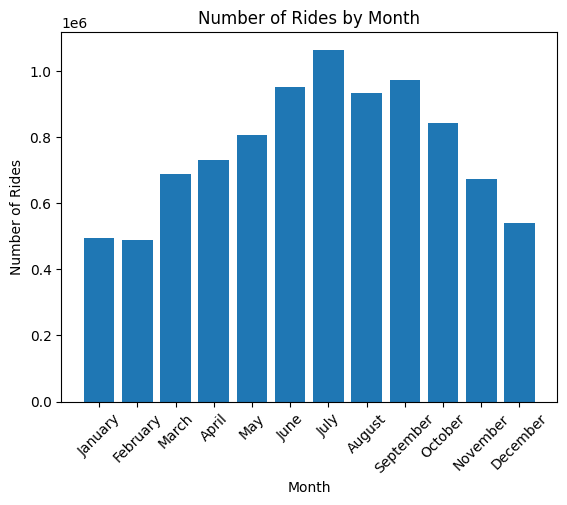

In [ ]:
import matplotlib.pyplot as plt
import calendar

# Group by month and count the number of rides
counts = cycle.groupBy("Month").count().orderBy("Month")

# Extract the month numbers and counts as lists
months = [row["Month"] for row in counts.collect()]
count_values = [row["count"] for row in counts.collect()]

# Convert month numbers to month names
month_names = [calendar.month_name[month_num] for month_num in months]

# Create a bar chart using matplotlib
plt.bar(month_names, count_values)
plt.title("Number of Rides by Month")
plt.xlabel("Month")
plt.ylabel("Number of Rides")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

<ipython-input-44-ac2d84b619fd>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Day', y='count', data=ride_counts_pd, order=days, palette=colors)


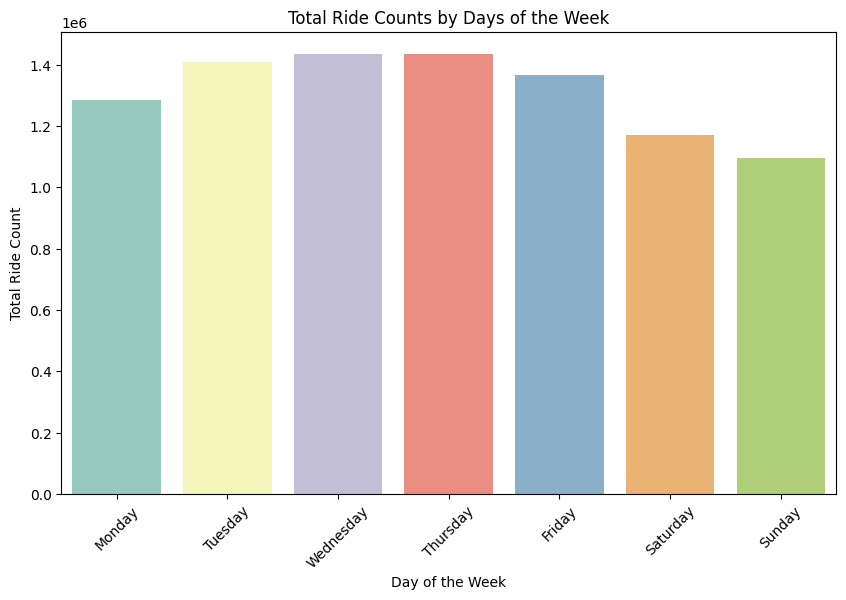

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
#Ride count by day for the dataframe
# Register the DataFrame as a temporary view
cycle.createOrReplaceTempView("rides")

# Query the DataFrame to calculate the ride counts by day of the week
query = """
    SELECT Day, COUNT(*) AS count
    FROM rides
    GROUP BY Day
    ORDER BY Day
"""
ride_counts_per_day = spark.sql(query)

# Convert the resulting DataFrame to a Pandas DataFrame for plotting
ride_counts_pd = ride_counts_per_day.toPandas()

# Define the order of the days of the week
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Set a custom color palette
colors = sns.color_palette('Set3', len(days))

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Day', y='count', data=ride_counts_pd, order=days, palette=colors)
plt.title('Total Ride Counts by Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Ride Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
from pyspark.sql.functions import col

# DataFrame with rides related to "Baylis Road" and "Waterloo station"
baylis_waterloo_rides = cycle.filter(
    col("StartStation Name").contains("Baylis Road") |
    col("StartStation Name").contains("Waterloo station")
)



# Show some results to verify
baylis_waterloo_rides.show()

+---------+--------+-------+-------------------+-------------+--------------------+-------------------+---------------+--------------------+-----+---------+
|Rental Id|Duration|Bike Id|           End Date|EndStation Id|     EndStation Name|         Start Date|StartStation Id|   StartStation Name|Month|      Day|
+---------+--------+-------+-------------------+-------------+--------------------+-------------------+---------------+--------------------+-----+---------+
| 34335942|     600|   7213|2014-06-25 18:59:00|          199|Great Tower Stree...|2014-06-25 18:49:00|            272|Baylis Road, Wate...|    6|Wednesday|
| 34292680|     540|  11506|2014-06-24 18:12:00|          199|Great Tower Stree...|2014-06-24 18:03:00|            272|Baylis Road, Wate...|    6|  Tuesday|
| 34251992|     600|   1845|2014-06-23 17:58:00|          199|Great Tower Stree...|2014-06-23 17:48:00|            272|Baylis Road, Wate...|    6|   Monday|
| 34618956|     720|   8070|2014-07-03 17:59:00|          

In [ ]:
# DataFrame without rides related to "Baylis Road" and "Waterloo station"
other_rides = cycle.filter(
    ~(col("StartStation Name").contains("Baylis Road") |
      col("StartStation Name").contains("Waterloo station"))
)

# Show some results to verify
other_rides.show()

+---------+--------+-------+-------------------+-------------+--------------------+-------------------+---------------+--------------------+-----+---------+
|Rental Id|Duration|Bike Id|           End Date|EndStation Id|     EndStation Name|         Start Date|StartStation Id|   StartStation Name|Month|      Day|
+---------+--------+-------+-------------------+-------------+--------------------+-------------------+---------------+--------------------+-----+---------+
| 34263367|    1080|   9076|2014-06-24 00:57:00|          695|Islington Green, ...|2014-06-24 00:39:00|            311|Foley Street, Fit...|    6|  Tuesday|
| 34603487|     660|   6328|2014-07-03 11:51:00|          695|Islington Green, ...|2014-07-03 11:40:00|             22|Northington Stree...|    7| Thursday|
| 34689078|     120|   2006|2014-07-05 15:09:00|          357|Howland Street, F...|2014-07-05 15:07:00|            311|Foley Street, Fit...|    7| Saturday|
| 34724273|    1260|   7904|2014-07-06 16:35:00|          

In [ ]:
from pyspark.sql.functions import month, year

# Assuming 'baylis_waterloo_rides' and 'other_rides' are previously defined DataFrames
# Union the two DataFrames
journey = baylis_waterloo_rides.union(other_rides)

# Add the "Start Month" column based on the 'Start Date' column
j_df = journey.withColumn('Start Month', month('Start Date'))

# Filter for rides in the year 2014
rides_2014_df = j_df.filter(year('Start Date') == 2014)

# Show the first 20 rows of the DataFrame
rides_2014_df.show(20)


+---------+--------+-------+-------------------+-------------+--------------------+-------------------+---------------+--------------------+-----+---------+-----------+
|Rental Id|Duration|Bike Id|           End Date|EndStation Id|     EndStation Name|         Start Date|StartStation Id|   StartStation Name|Month|      Day|Start Month|
+---------+--------+-------+-------------------+-------------+--------------------+-------------------+---------------+--------------------+-----+---------+-----------+
| 34335942|     600|   7213|2014-06-25 18:59:00|          199|Great Tower Stree...|2014-06-25 18:49:00|            272|Baylis Road, Wate...|    6|Wednesday|          6|
| 34292680|     540|  11506|2014-06-24 18:12:00|          199|Great Tower Stree...|2014-06-24 18:03:00|            272|Baylis Road, Wate...|    6|  Tuesday|          6|
| 34251992|     600|   1845|2014-06-23 17:58:00|          199|Great Tower Stree...|2014-06-23 17:48:00|            272|Baylis Road, Wate...|    6|   Monday

In [ ]:
# group by "StartStation Id" and sum their "Duration (min)", sort in descending order
ride_df = (rides_2014_df
               .select("StartStation Id", "StartStation Name", "EndStation Id", "EndStation Name", "Duration")
               .groupBy("StartStation Id", "StartStation Name")
               .agg(sum("Duration").alias("Total Duration"))
               .orderBy("Total Duration", ascending=False))

# show top 10
ride_df.show(10)
# group "StartStation Id" and sum their "Duration" (seconds), sort in descending order

+---------------+--------------------+--------------+
|StartStation Id|   StartStation Name|Total Duration|
+---------------+--------------------+--------------+
|            191|Hyde Park Corner,...|      86662500|
|             14|Belgrove Street ,...|      69266040|
|            303|Albert Gate, Hyde...|      64642920|
|            154|Waterloo Station ...|      60821520|
|            307|Black Lion Gate, ...|      60750900|
|            213|Wellington Arch, ...|      45956520|
|            248|Triangle Car Park...|      43934100|
|            406|Speakers' Corner ...|      42673680|
|            374|Waterloo Station ...|      40306200|
|            217|Wormwood Street, ...|      40223760|
+---------------+--------------------+--------------+
only showing top 10 rows



In [ ]:
#group by "EndStation Id" and sum their "Duration", sort in descending order
ends_df = (baylis_waterloo_rides
               .select("StartStation Id", "StartStation Name", "EndStation Id", "EndStation Name", "Duration")
               .groupBy("EndStation Id", "EndStation Name")
               .agg(sum("Duration").alias("Total Duration"))
               .orderBy("Total Duration", ascending=False))
ends_df.show()


+-------------+--------------------+--------------+
|EndStation Id|     EndStation Name|Total Duration|
+-------------+--------------------+--------------+
|          144|Kennington Cross,...|        380160|
|          619|Irene Road, Parso...|        367140|
|          217|Wormwood Street, ...|        364680|
|          194|Hop Exchange, The...|        363540|
|          251|Brushfield Street...|        297480|
|          321|Bermondsey Street...|        294120|
|          215|Moorfields, Moorgate|        263460|
|           85|Tanner Street, Be...|        258780|
|          295|Swan Street, The ...|        240180|
|          440|Kennington Oval, ...|        234540|
|          104|    Crosswall, Tower|        234480|
|          102|Jewry Street, Ald...|        224700|
|          199|Great Tower Stree...|        221760|
|          732|Duke Street Hill,...|        213120|
|          314|Tyers Gate, Bermo...|        210000|
|          278|Tooley Street, Be...|        207420|
|          2

In [ ]:


# Extract the month from the 'Start Date' and create a new column for it
baylis_waterloo_rides = baylis_waterloo_rides.withColumn("Month", month("Start Date"))



In [ ]:
# Example 1: Aggregate data by month (e.g., count rides per month)
baylis_waterloo_rides_monthly_aggregate = baylis_waterloo_rides.groupBy("Month").count().orderBy("Month")
baylis_waterloo_rides_monthly_aggregate.show()

+-----+-----+
|Month|count|
+-----+-----+
|    1| 1479|
|    2| 1419|
|    3| 1903|
|    4| 2025|
|    5| 2304|
|    6| 2595|
|    7| 2870|
|    8| 2545|
|    9| 2686|
|   10| 2297|
|   11| 1988|
|   12| 1446|
+-----+-----+



In [ ]:
from pyspark.sql.functions import sum

# lowest is your DataFrame
lowest_baylis_waterloo_rides = (baylis_waterloo_rides
                           .select("StartStation Id", "StartStation Name", "EndStation Id", "EndStation Name", "Duration")
                           .groupBy("StartStation Id", "StartStation Name")
                           .agg(sum("Duration").alias("Total Duration"))
                           .orderBy("Total Duration", ascending=True))

print("Station with the lowest total duration:")

lowest_baylis_waterloo_rides.show(10)

Station with the lowest total duration:
+---------------+--------------------+--------------+
|StartStation Id|   StartStation Name|Total Duration|
+---------------+--------------------+--------------+
|            272|Baylis Road, Wate...|      18913320|
+---------------+--------------------+--------------+



In [ ]:
# highest duration in your DataFrame
highest_baylis_waterloo_rides = (baylis_waterloo_rides
                            .select("StartStation Id", "StartStation Name", "EndStation Id", "EndStation Name", "Duration")
                            .groupBy("StartStation Id", "StartStation Name")
                            .agg(sum("Duration").alias("Total Duration"))
                            .orderBy("Total Duration", ascending=False))

print("Station with the highest total duration:")
# Show only the first ten row, which will have the highest total duration
highest_baylis_waterloo_rides.show(10)

Station with the highest total duration:
+---------------+--------------------+--------------+
|StartStation Id|   StartStation Name|Total Duration|
+---------------+--------------------+--------------+
|            272|Baylis Road, Wate...|      18913320|
+---------------+--------------------+--------------+



In [ ]:
from pyspark.sql.functions import sum

# lowest is your DataFrame
lowest_other_rides = (other_rides
                           .select("StartStation Id", "StartStation Name", "EndStation Id", "EndStation Name", "Duration")
                           .groupBy("StartStation Id", "StartStation Name")
                           .agg(sum("Duration").alias("Total Duration"))
                           .orderBy("Total Duration", ascending=True))

print("Station with the lowest total duration:")

lowest_other_rides.show(10)

Station with the lowest total duration:
+---------------+--------------------+--------------+
|StartStation Id|   StartStation Name|Total Duration|
+---------------+--------------------+--------------+
|            241|Contact Centre, S...|           420|
|            198|           tabletop1|          1500|
|            555|Westfield Eastern...|        521640|
|            778|       Pop Up Dock 1|        567780|
|            672|Grant Road Centra...|        631800|
|            767|Santos Road, Wand...|        634380|
|            777|Limburg Road, Cla...|        730560|
|            767|Wandsworth Museum...|        760560|
|            494|South Quay East, ...|        915900|
|            752|Manfred Road, Eas...|       1070580|
+---------------+--------------------+--------------+
only showing top 10 rows



In [ ]:
# highest duration in your DataFrame
highest_other_rides = (other_rides
                            .select("StartStation Id", "StartStation Name", "EndStation Id", "EndStation Name", "Duration")
                            .groupBy("StartStation Id", "StartStation Name")
                            .agg(sum("Duration").alias("Total Duration"))
                            .orderBy("Total Duration", ascending=False))

print("Station with the highest total duration:")
# Show only the first ten row, which will have the highest total duration
highest_other_rides.show(10)

Station with the highest total duration:
+---------------+--------------------+--------------+
|StartStation Id|   StartStation Name|Total Duration|
+---------------+--------------------+--------------+
|            191|Hyde Park Corner,...|      87027420|
|             14|Belgrove Street ,...|      69367620|
|            303|Albert Gate, Hyde...|      65005680|
|            307|Black Lion Gate, ...|      60929700|
|            154|Waterloo Station ...|      60871920|
|            213|Wellington Arch, ...|      46118940|
|            248|Triangle Car Park...|      44029200|
|            406|Speakers' Corner ...|      42773820|
|            374|Waterloo Station ...|      40416720|
|            217|Wormwood Street, ...|      40313760|
+---------------+--------------------+--------------+
only showing top 10 rows



In [ ]:
# Extract the month from the 'Start Date' and create a new column for it
other_rides = other_rides.withColumn("Month", month("Start Date"))

In [ ]:
# Example 1: Aggregate data by month (e.g., count rides per month)
other_rides_monthly_aggregate = other_rides.groupBy("Month").count().orderBy("Month")
other_rides_monthly_aggregate.show()

+-----+-------+
|Month|  count|
+-----+-------+
|    1| 494376|
|    2| 488247|
|    3| 686747|
|    4| 728190|
|    5| 804056|
|    6| 949368|
|    7|1062605|
|    8| 931259|
|    9| 970917|
|   10| 840066|
|   11| 671479|
|   12| 538244|
+-----+-------+



In [ ]:
from pyspark.sql.functions import min, max

# Calculate the maximum duration for each start station in the  DataFrame
maximum_dur = baylis_waterloo_rides.groupBy("StartStation Name").agg(max("Duration").alias("max_duration"))

# Calculate the minimum duration for each start station in the  DataFrame
mininum_dur = baylis_waterloo_rides.groupBy("StartStation Name").agg(min("Duration").alias("min_duration"))


In [ ]:
maximum_dur.show()

+--------------------+------------+
|   StartStation Name|max_duration|
+--------------------+------------+
|Baylis Road, Wate...|        2460|
+--------------------+------------+



In [ ]:
mininum_dur.show()

+--------------------+------------+
|   StartStation Name|min_duration|
+--------------------+------------+
|Baylis Road, Wate...|          60|
+--------------------+------------+



In [ ]:
#perform inner-join based on start station name
a_df= maximum_dur.join(mininum_dur, ['StartStation Name'], 'inner')
a_df.show()

+--------------------+------------+------------+
|   StartStation Name|max_duration|min_duration|
+--------------------+------------+------------+
|Baylis Road, Wate...|        2460|          60|
+--------------------+------------+------------+



In [ ]:
#perform inner-join based on start station name
ag_df= maximum_dur.join(mininum_dur, ['StartStation Name'], 'inner')
ag_df.show()

+--------------------+------------+------------+
|   StartStation Name|max_duration|min_duration|
+--------------------+------------+------------+
|Baylis Road, Wate...|        2460|          60|
+--------------------+------------+------------+



In [ ]:
from pyspark.sql.functions import min, max

# Calculate the maximum duration for each start station in the  DataFrame
max_dur_other_rides = other_rides.groupBy("StartStation Name").agg(max("Duration").alias("max_duration"))

# Calculate the minimum duration for each start station in the  DataFrame
min_dur_other_rides = other_rides.groupBy("StartStation Name").agg(min("Duration").alias("min_duration"))


In [ ]:
max_dur_other_rides.show()

+--------------------+------------+
|   StartStation Name|max_duration|
+--------------------+------------+
|Dunston Road , Ha...|        2460|
|George Place Mews...|        2460|
|Panton Street, We...|        2460|
|  Park Lane, Mayfair|        2460|
|Portland Place, M...|        2460|
|Russell Gardens, ...|        2460|
|Montgomery Square...|        2460|
|Kingsway Southbou...|        2460|
|Appold Street, Li...|        2460|
|Gloucester Street...|        2460|
|Cadogan Close, Vi...|        2460|
|Charlotte Street,...|        2460|
|Lambeth Road, Vau...|        2460|
|London Zoo, Regen...|        2460|
|Embankment (Horse...|        2460|
|Falcon Road, Clap...|        2460|
|Christopher Stree...|        2460|
|Queen Marys, Mile...|        2460|
|Imperial Road, Sa...|        2460|
|Finlay Street, Fu...|        2460|
+--------------------+------------+
only showing top 20 rows



In [ ]:
min_dur_other_rides.show()

+--------------------+------------+
|   StartStation Name|min_duration|
+--------------------+------------+
|Dunston Road , Ha...|          60|
|George Place Mews...|          60|
|Panton Street, We...|          60|
|  Park Lane, Mayfair|          60|
|Portland Place, M...|          60|
|Russell Gardens, ...|          60|
|Montgomery Square...|          60|
|Kingsway Southbou...|          60|
|Appold Street, Li...|          60|
|Gloucester Street...|          60|
|Cadogan Close, Vi...|         180|
|Charlotte Street,...|          60|
|Lambeth Road, Vau...|          60|
|London Zoo, Regen...|         120|
|Embankment (Horse...|          60|
|Falcon Road, Clap...|          60|
|Christopher Stree...|          60|
|Queen Marys, Mile...|          60|
|Imperial Road, Sa...|          60|
|Finlay Street, Fu...|         120|
+--------------------+------------+
only showing top 20 rows



In [ ]:
#perform inner-join based on start station name
c_df= max_dur_other_rides.join(min_dur_other_rides, ['StartStation Name'], 'inner')
c_df.show()

+--------------------+------------+------------+
|   StartStation Name|max_duration|min_duration|
+--------------------+------------+------------+
|Dunston Road , Ha...|        2460|          60|
|George Place Mews...|        2460|          60|
|Panton Street, We...|        2460|          60|
|  Park Lane, Mayfair|        2460|          60|
|Portland Place, M...|        2460|          60|
|Russell Gardens, ...|        2460|          60|
|Montgomery Square...|        2460|          60|
|Kingsway Southbou...|        2460|          60|
|Appold Street, Li...|        2460|          60|
|Gloucester Street...|        2460|          60|
|Cadogan Close, Vi...|        2460|         180|
|Charlotte Street,...|        2460|          60|
|Lambeth Road, Vau...|        2460|          60|
|London Zoo, Regen...|        2460|         120|
|Embankment (Horse...|        2460|          60|
|Falcon Road, Clap...|        2460|          60|
|Christopher Stree...|        2460|          60|
|Queen Marys, Mile..

<ipython-input-67-368683760bab>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Day', y='count', data=ride_counts, order=days, palette=colors)


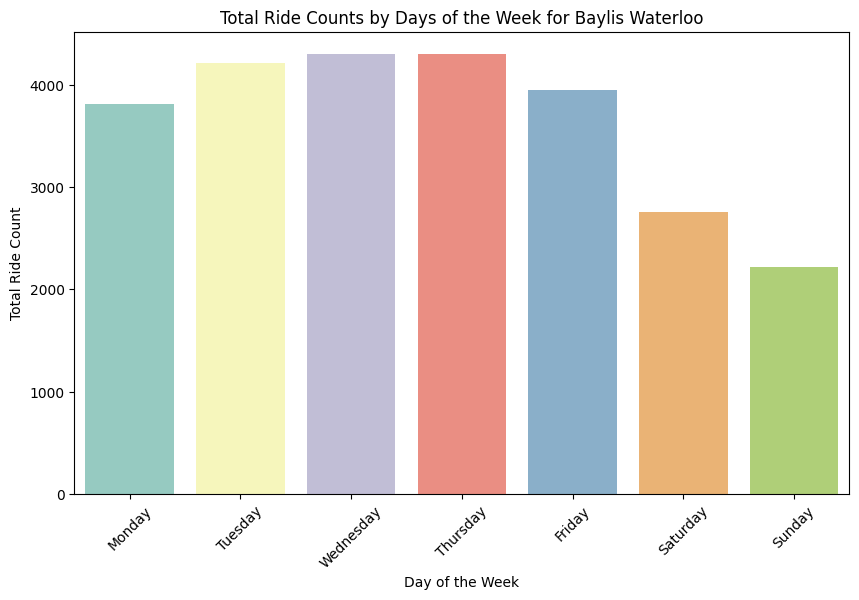

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
#Ride count by day for the dataframe
# Register the DataFrame as a temporary view
baylis_waterloo_rides.createOrReplaceTempView("rides")

# Query the DataFrame to calculate the ride counts by day of the week
query = """
    SELECT Day, COUNT(*) AS count
    FROM rides
    GROUP BY Day
    ORDER BY Day
"""
ride_counts_per_day = spark.sql(query)

# Convert the resulting DataFrame to a Pandas DataFrame for plotting
ride_counts = ride_counts_per_day.toPandas()

# Define the order of the days of the week
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Set a custom color palette
colors = sns.color_palette('Set3', len(days))

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Day', y='count', data=ride_counts, order=days, palette=colors)
plt.title('Total Ride Counts by Days of the Week for Baylis Waterloo')
plt.xlabel('Day of the Week')
plt.ylabel('Total Ride Count')
plt.xticks(rotation=45)
plt.show()

<ipython-input-68-64e7028c26c1>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Day', y='count', data=ride_counts_p, order=days, palette=colors)


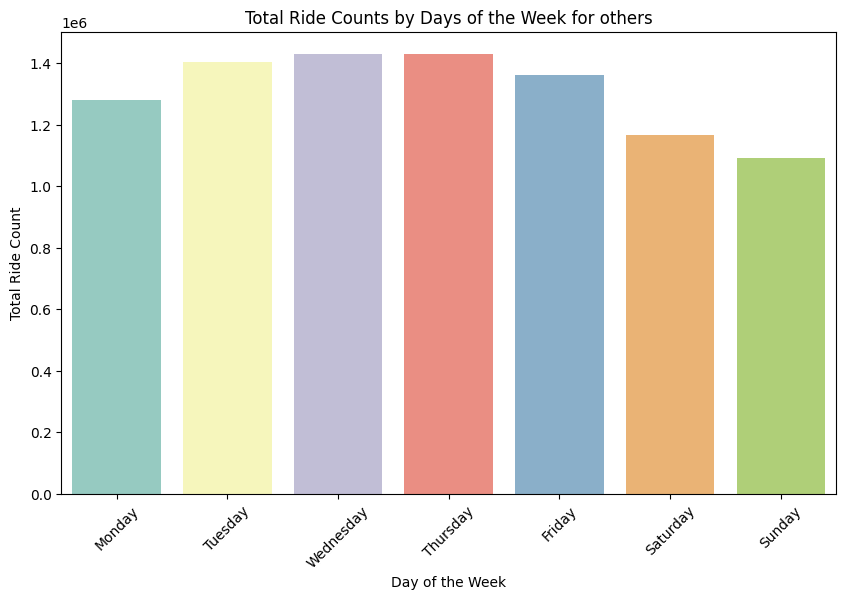

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
#Ride count by day for the dataframe
# Register the DataFrame as a temporary view
other_rides.createOrReplaceTempView("rides")

# Query the DataFrame to calculate the ride counts by day of the week
query = """
    SELECT Day, COUNT(*) AS count
    FROM rides
    GROUP BY Day
    ORDER BY Day
"""
ride_counts_per_day = spark.sql(query)

# Convert the resulting DataFrame to a Pandas DataFrame for plotting
ride_counts_p = ride_counts_per_day.toPandas()

# Define the order of the days of the week
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Set a custom color palette
colors = sns.color_palette('Set3', len(days))

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Day', y='count', data=ride_counts_p, order=days, palette=colors)
plt.title('Total Ride Counts by Days of the Week for others')
plt.xlabel('Day of the Week')
plt.ylabel('Total Ride Count')
plt.xticks(rotation=45)
plt.show()

<ipython-input-69-b3d8e167e7ec>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='count', data=month_counts_pd, palette='viridis')


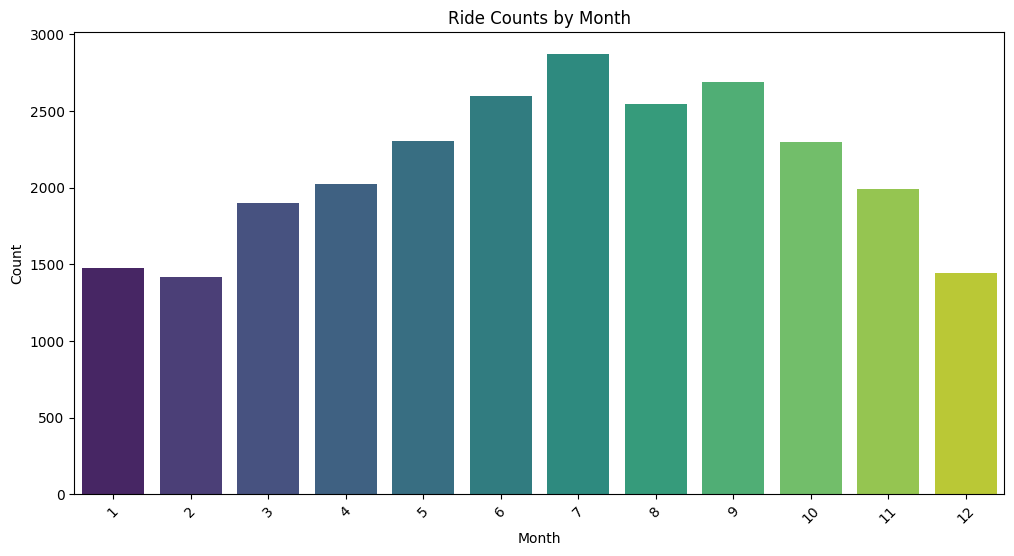

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming `cycle` is your Spark DataFrame with a 'Month' column already included

# Group the data by month and count the number of records for each month
month_counts_df = baylis_waterloo_rides.groupBy('Month').count().orderBy('Month')

# Convert the resulting DataFrame to a Pandas DataFrame for plotting
month_counts_pd = month_counts_df.toPandas()

# Set the order of months as a Categorical type to ensure correct ordering in the plot
month_counts_pd['Month'] = pd.Categorical(month_counts_pd['Month'], categories=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ordered=True)

# Plot a bar chart of the counts by month
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='count', data=month_counts_pd, palette='viridis')
plt.title('Ride Counts by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()


<ipython-input-70-640b78d6ce8b>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='count', data=month_counts_pd, palette='viridis')


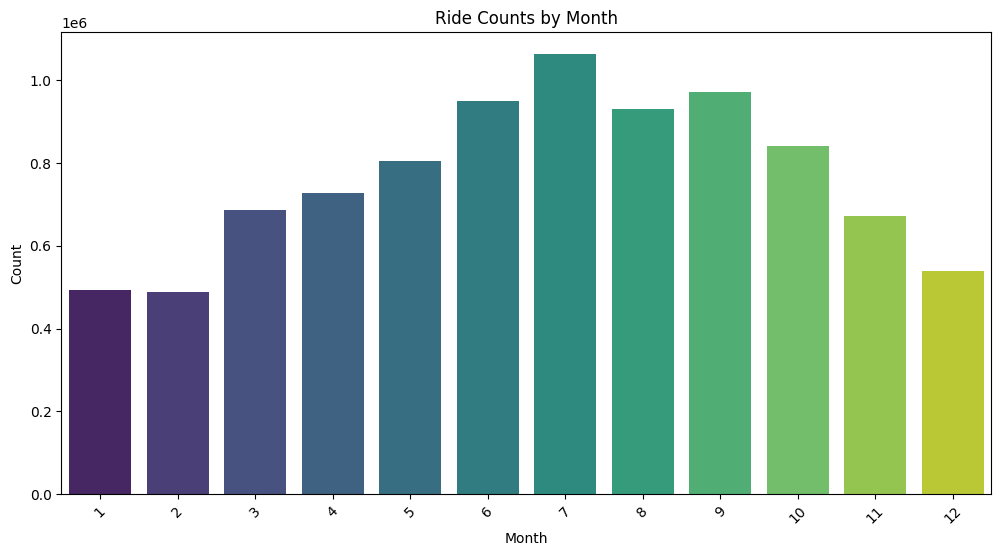

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming `cycle` is your Spark DataFrame with a 'Month' column already included

# Group the data by month and count the number of records for each month
month_counts_df = other_rides.groupBy('Month').count().orderBy('Month')

# Convert the resulting DataFrame to a Pandas DataFrame for plotting
month_counts_pd = month_counts_df.toPandas()

# Set the order of months as a Categorical type to ensure correct ordering in the plot
month_counts_pd['Month'] = pd.Categorical(month_counts_pd['Month'], categories=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ordered=True)

# Plot a bar chart of the counts by month
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='count', data=month_counts_pd, palette='viridis')
plt.title('Ride Counts by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

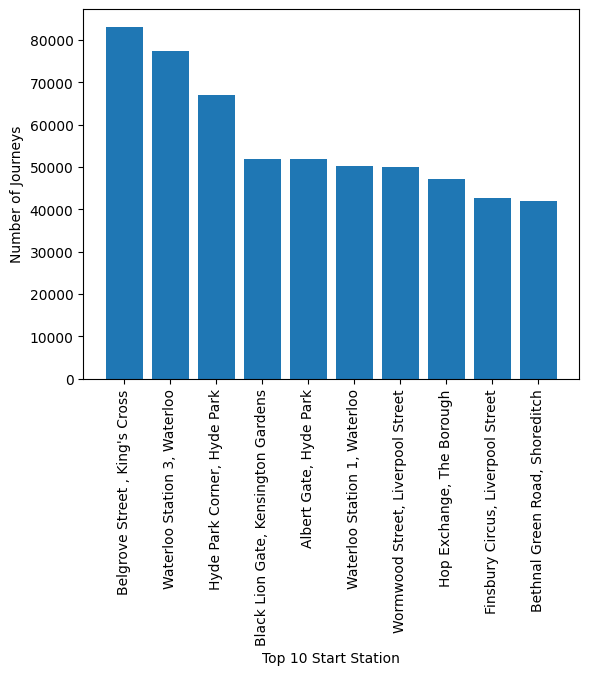

In [ ]:
from pyspark.sql.functions import desc

# Count the number of times each start station appears
start_station_counts = other_rides.groupBy("StartStation Name").count()

# Sort the stations by count in descending order
sorted_stations = start_station_counts.orderBy(desc("count"))

# Take the top 10 stations with the most counts
top_stations = sorted_stations.limit(10)

# Convert the top 10 stations to a Pandas dataframe for plotting
pandas_df = top_stations.toPandas()

# Plot a bar chart of the top 10 stations
import matplotlib.pyplot as plt

plt.bar(pandas_df["StartStation Name"], pandas_df["count"])
plt.xticks(rotation=90)
plt.xlabel("Top 10 Start Station")
plt.ylabel("Number of Journeys")
plt.show()

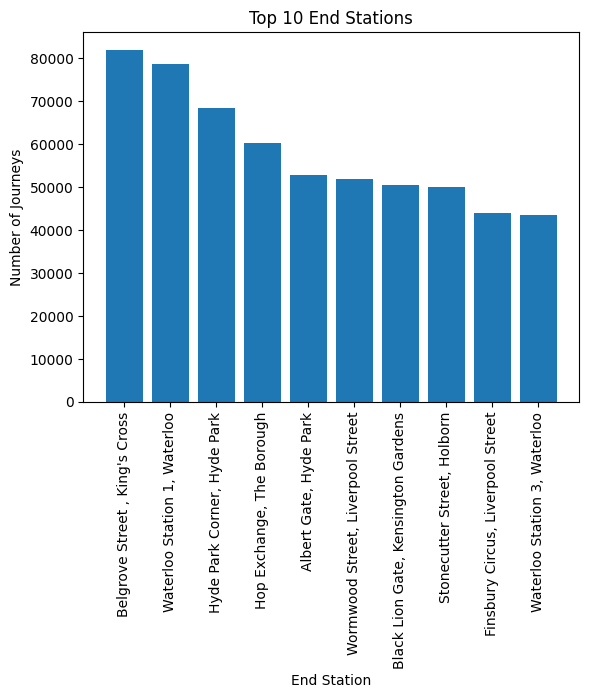

In [ ]:
import matplotlib.pyplot as plt

# Group by End Station and count occurrences
end_station_counts = other_rides.groupBy('EndStation Name').count()
sorted_end =end_station_counts.orderBy(desc("count"))


# Get the top 10 stations with the highest counts
top_end_stations = sorted_end.limit(10)

# Extract station names and counts
pandend_df=top_end_stations.toPandas()

# Plot bar chart
plt.bar(pandend_df["EndStation Name"], pandend_df["count"])
plt.xticks(rotation=90)
plt.title('Top 10 End Stations')
plt.xlabel('End Station')
plt.ylabel('Number of Journeys')
plt.show()

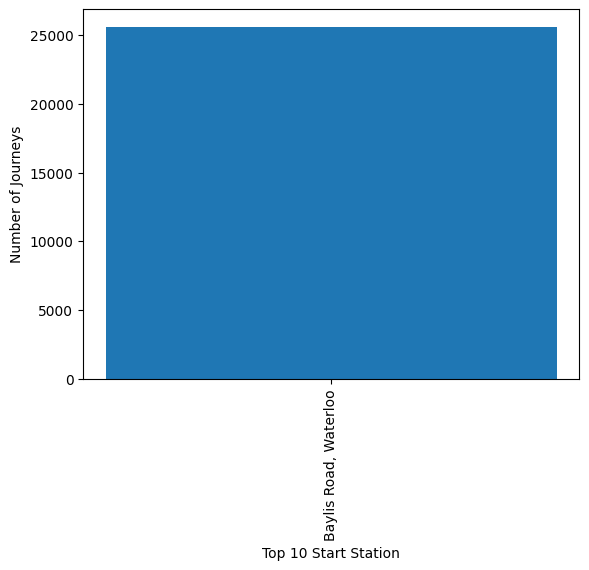

In [ ]:
from pyspark.sql.functions import desc

# Count the number of times each start station appears
start_station = baylis_waterloo_rides.groupBy("StartStation Name").count()

# Sort the stations by count in descending order
sort_stations = start_station.orderBy(desc("count"))

# Take the top 10 stations with the most counts
top_station = sort_stations.limit(10)

# Convert the top 10 stations to a Pandas dataframe for plotting
panda_df = top_station.toPandas()

# Plot a bar chart of the top 10 stations
import matplotlib.pyplot as plt

plt.bar(panda_df["StartStation Name"], panda_df["count"])
plt.xticks(rotation=90)
plt.xlabel("Top 10 Start Station")
plt.ylabel("Number of Journeys")
plt.show()

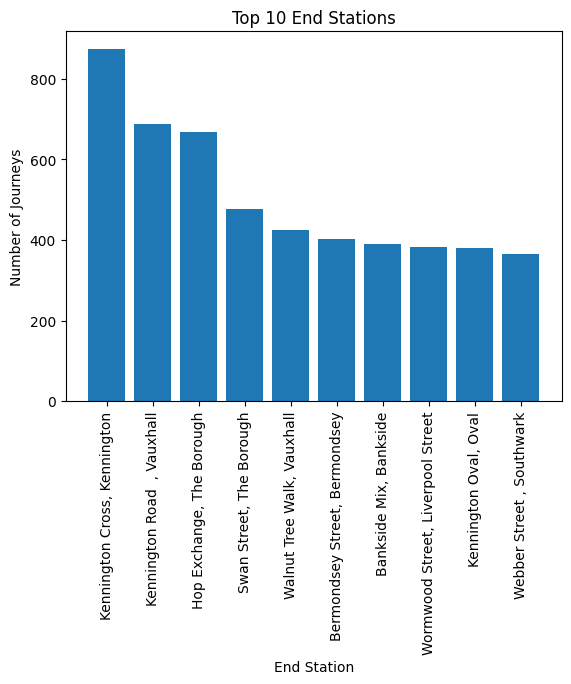

In [ ]:
import matplotlib.pyplot as plt

# Group by End Station and count occurrences
end_station_count = baylis_waterloo_rides.groupBy('EndStation Name').count()
sorted =end_station_count.orderBy(desc("count"))


# Get the top 10 stations with the highest counts
top_end_station = sorted.limit(10)

# Extract station names and counts
pandend_d=top_end_station.toPandas()

# Plot bar chart
plt.bar(pandend_d["EndStation Name"], pandend_d["count"])
plt.xticks(rotation=90)
plt.title('Top 10 End Stations')
plt.xlabel('End Station')
plt.ylabel('Number of Journeys')
plt.show()

In [ ]:
# Extract the month from the 'Start Date' and create a new column for it
cycle = baylis_waterloo_rides.withColumn("Month", month("Start Date"))

# Example 1: Aggregate data by month (e.g., count rides per month)
monthly_aggregate = baylis_waterloo_rides.groupBy("Month").count().orderBy("Month")

In [ ]:
# Extract the month from the 'Start Date' and create a new column for it
other_rides_cycle = other_rides.withColumn("Month", month("Start Date"))

# Example 1: Aggregate data by month (e.g., count rides per month)
_other_rides_monthly_aggregate = other_rides.groupBy("Month").count().orderBy("Month")

In [ ]:
from pyspark.sql.functions import avg, stddev

# Assuming 'Month' is a column in 'df' that represents the month number (1-12)

# Group the data by month and calculate mean and standard deviation for each month
baylis_monthly_stats = baylis_waterloo_rides.groupBy("Month").agg(
    avg(col("Duration")).alias("mean_duration"),
    stddev(col("Duration")).alias("stddev_duration")
).orderBy("Month")  # Order by month for easier readability

# Collect the statistics for all months
baylis_monthly_stats_list = baylis_monthly_stats.collect()

# Print the results
for month_stat in baylis_monthly_stats_list:
    print(f"Month: {month_stat['Month']}, Mean duration: {month_stat['mean_duration']}, Standard deviation: {month_stat['stddev_duration']}")


Month: 1, Mean duration: 693.3468559837728, Standard deviation: 413.67501533265676
Month: 2, Mean duration: 719.830866807611, Standard deviation: 431.6262744172339
Month: 3, Mean duration: 711.0141881240147, Standard deviation: 423.5593151961634
Month: 4, Mean duration: 720.2962962962963, Standard deviation: 423.35745265495086
Month: 5, Mean duration: 744.2447916666666, Standard deviation: 440.8067476458163
Month: 6, Mean duration: 778.8901734104046, Standard deviation: 465.5801148772258
Month: 7, Mean duration: 806.5923344947735, Standard deviation: 472.53640004353747
Month: 8, Mean duration: 788.8644400785855, Standard deviation: 468.3830820697034
Month: 9, Mean duration: 749.2181682799702, Standard deviation: 442.9001081846104
Month: 10, Mean duration: 727.5489769264258, Standard deviation: 421.93055389294125
Month: 11, Mean duration: 675.4527162977868, Standard deviation: 392.5684157243474
Month: 12, Mean duration: 670.7053941908714, Standard deviation: 398.46407582333916


In [ ]:
from pyspark.sql.functions import avg, stddev

# Assuming 'Month' is a column in 'df' that represents the month number (1-12)

# Group the data by month and calculate mean and standard deviation for each month
monthly_stats = other_rides.groupBy("Month").agg(
    avg(col("Duration")).alias("mean_duration"),
    stddev(col("Duration")).alias("stddev_duration")
).orderBy("Month")  # Order by month for easier readability

# Collect the statistics for all months
monthly_stats_list = monthly_stats.collect()

# Print the results
for month_stat in monthly_stats_list:
    print(f"Month: {month_stat['Month']}, Mean duration: {month_stat['mean_duration']}, Standard deviation: {month_stat['stddev_duration']}")


Month: 1, Mean duration: 784.6078693140444, Standard deviation: 465.74431183663245
Month: 2, Mean duration: 817.9875759605281, Standard deviation: 485.4764897120505
Month: 3, Mean duration: 859.8051101788577, Standard deviation: 506.2808882617761
Month: 4, Mean duration: 888.2786635356157, Standard deviation: 516.5522813377088
Month: 5, Mean duration: 887.0294108868039, Standard deviation: 514.547337829659
Month: 6, Mean duration: 903.4239199130369, Standard deviation: 515.4381514378227
Month: 7, Mean duration: 920.0436662729801, Standard deviation: 520.3235827279544
Month: 8, Mean duration: 929.0326965967578, Standard deviation: 522.5228077513925
Month: 9, Mean duration: 884.8119046221253, Standard deviation: 506.0048383218555
Month: 10, Mean duration: 846.4189956503418, Standard deviation: 493.72839583098306
Month: 11, Mean duration: 816.551820682404, Standard deviation: 480.90336259707584
Month: 12, Mean duration: 819.3684648598033, Standard deviation: 489.1270973038193


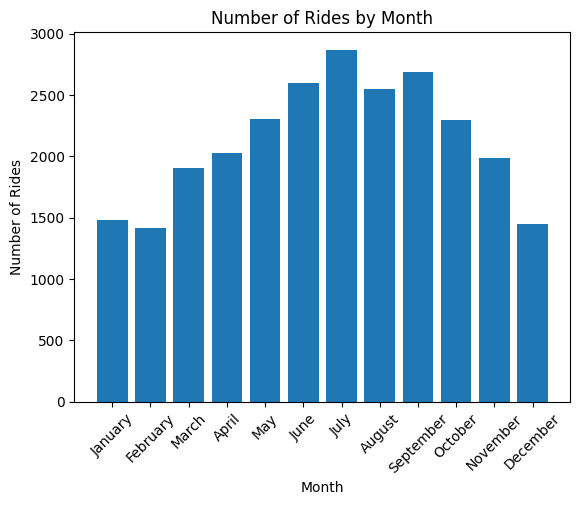

In [ ]:
import matplotlib.pyplot as plt
import calendar

# Group by month and count the number of rides
counts = cycle.groupBy("Month").count().orderBy("Month")

# Extract the month numbers and counts as lists
months = [row["Month"] for row in counts.collect()]
count_values = [row["count"] for row in counts.collect()]

# Convert month numbers to month names
month_names = [calendar.month_name[month_num] for month_num in months]

# Create a bar chart using matplotlib
plt.bar(month_names, count_values)
plt.title("Number of Rides by Month")
plt.xlabel("Month")
plt.ylabel("Number of Rides")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


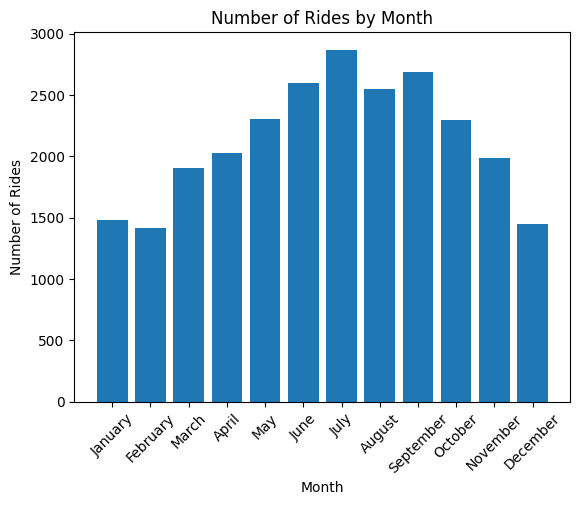

In [ ]:
import matplotlib.pyplot as plt
import calendar

# Group by month and count the number of rides
count = other_rides.groupBy("Month").count().orderBy("Month")

# Extract the month numbers and counts as lists
months = [row["Month"] for row in counts.collect()]
count_value = [row["count"] for row in counts.collect()]

# Convert month numbers to month names
month_name = [calendar.month_name[month_num] for month_num in months]

# Create a bar chart using matplotlib
plt.bar(month_name, count_value)
plt.title("Number of Rides by Month")
plt.xlabel("Month")
plt.ylabel("Number of Rides")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


In [ ]:
#calculate the minimum and maximum durations of bike rides for each start station in the 'journey_df' dataframe
max = other_rides.groupby("StartStation Name").agg({"Duration": "max"})
min = other_rides.groupby("StartStation Name").agg({"Duration": "min"})

min.show()
max.show()

+--------------------+-------------+
|   StartStation Name|min(Duration)|
+--------------------+-------------+
|Dunston Road , Ha...|           60|
|George Place Mews...|           60|
|Panton Street, We...|           60|
|  Park Lane, Mayfair|           60|
|Portland Place, M...|           60|
|Russell Gardens, ...|           60|
|Montgomery Square...|           60|
|Kingsway Southbou...|           60|
|Appold Street, Li...|           60|
|Gloucester Street...|           60|
|Cadogan Close, Vi...|          180|
|Charlotte Street,...|           60|
|Lambeth Road, Vau...|           60|
|London Zoo, Regen...|          120|
|Embankment (Horse...|           60|
|Falcon Road, Clap...|           60|
|Christopher Stree...|           60|
|Queen Marys, Mile...|           60|
|Imperial Road, Sa...|           60|
|Finlay Street, Fu...|          120|
+--------------------+-------------+
only showing top 20 rows

+--------------------+-------------+
|   StartStation Name|max(Duration)|
+-----------